<a href="https://www.linkedin.com/in/amit-maindola-51801423/"><img src = "https://cdn-images-1.medium.com/max/1200/1*u16a0WbJeckSdi6kGD3gVA.jpeg" width = 400> </a>
<h1 align="center"><font size=5 color="DE5538">Matplotlib - Object Oriented API</font></h1>

## Introduction
In this Notebook I will be continuing the Data Visualization using matplotlib package using its Object Oriented API. The real advantage of this approach is when more than one figure is created or when there are more than one subplot in a figure.

### Import all the required libraries and dependencies

In [15]:
# Import numpy and Matplotlib
# this time we will use individual package than pylab
import numpy as np
print(f'Nump version : {np.__version__}')

import matplotlib
print(f'Matplotlib version : {matplotlib.__version__}')

%config InlineBackend.figure_format = 'retina' # change this to png if your plots are too small
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

Nump version : 1.16.4
Matplotlib version : 3.1.0


## Dataset
For this tutorial we are using the Kaggle Titanic dataset because it has a mix of quantitative and categorical variables and is well suited to data exploration. In this tutorial, we will explore the demographics of passengers on the Titanic.

In [2]:
df = pd.read_csv("http://bit.ly/tcsv19").dropna()
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')

In [6]:
df.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


### Let's make Histogram

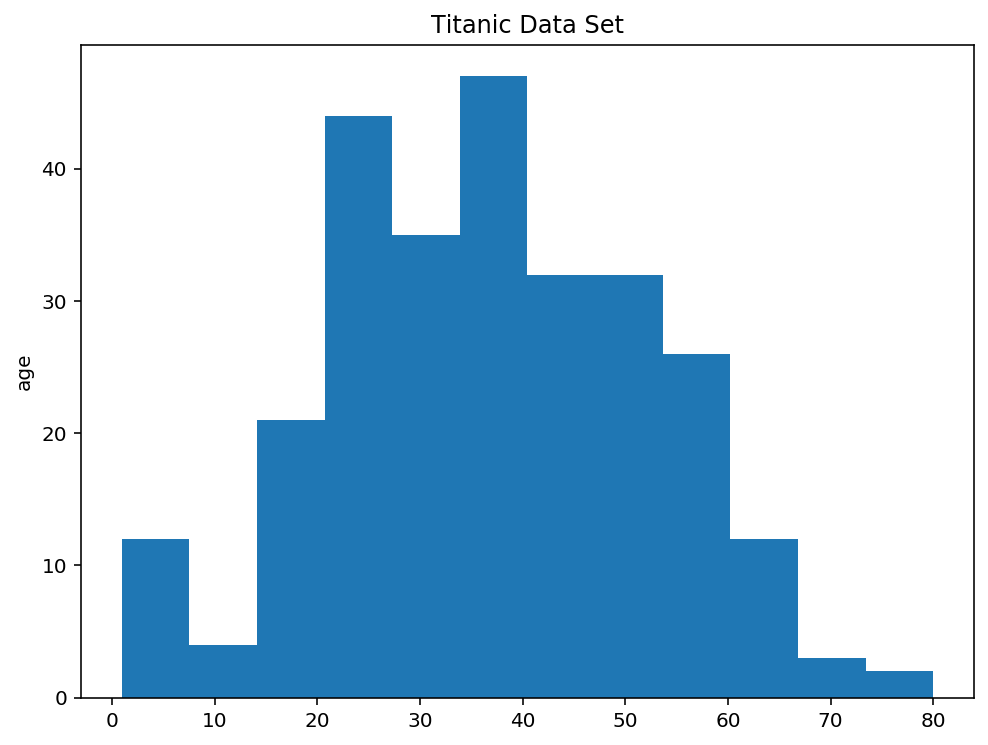

In [8]:
fig, ax = plt.subplots(figsize=(8,6))
# assigning value to _ means we don't care the return type, it is just to supress the Object type displayed in Notebook
_ = ax.hist('age', data=df, bins='auto')
_ = ax.set_title("Titanic Data Set")
_ = ax.set_ylabel("age")

Now replace the auto bins with the Custom bins and Ticks

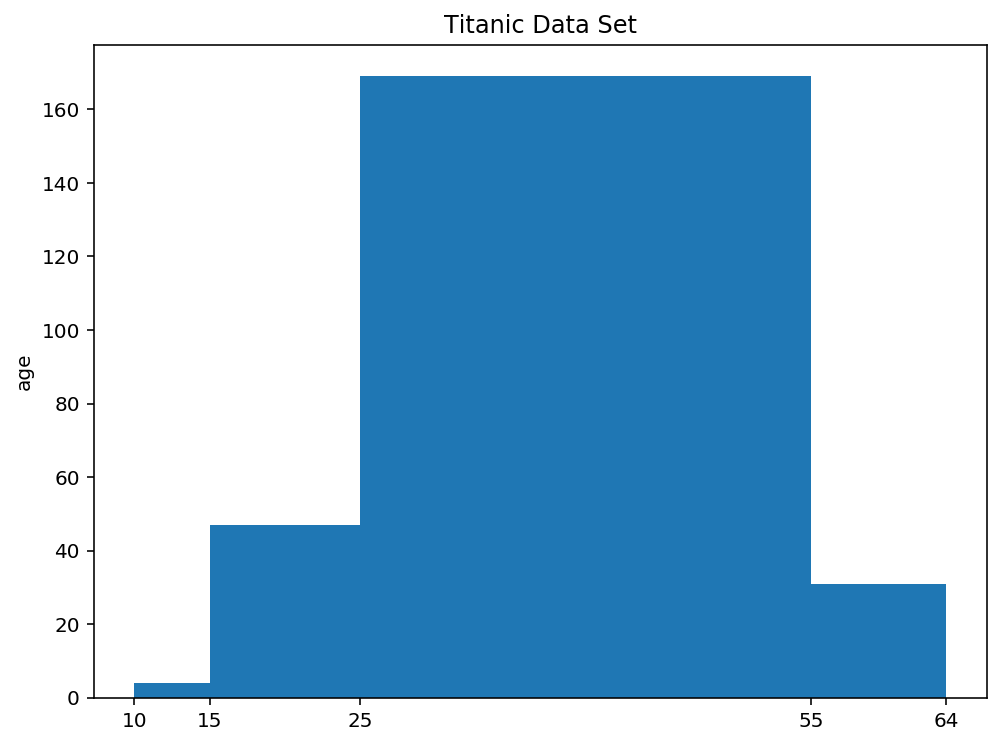

In [14]:
fig, ax = plt.subplots(figsize=(8,6))
# assigning value to _ means we don't care the return type, it is just to supress the Object type displayed in Notebook
_ = ax.hist('age', data=df, bins=[10, 15, 25, 55, 64])
_ = ax.set_title("Titanic Data Set")
_ = ax.set_ylabel("age")
_ = ax.set_xticks([10, 15, 25, 55, 64])

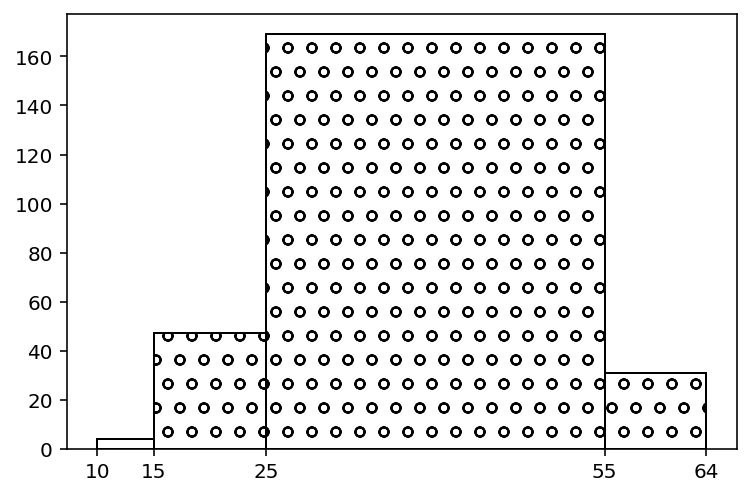

In [31]:
fig, ax = plt.subplots()
(density, edges, _) = ax.hist('age', data=df, bins=[10, 15, 25, 55, 64]
               , edgecolor='black', facecolor='w', hatch='o')
_ = ax.set_xticks([10, 15, 25, 55, 64])

### Probability Density
By default ax.hist returns the number in each bin and the bin edges used. The bin edges array is 1 longer than the counts because it is all of the left bin edges and then right edge of the last bin. This is useful when we need to compare absolute values between data sets, but sometime we need to be able to compare the probability density instead.<br>
You get probability when you put **density=True**

In [114]:
fig, ax = plt.subplots()
(density, edges, _) = ax.hist('fare', data=df, bins='auto', density=False
               , edgecolor='black', facecolor='w', hatch='x', )

print(f'Density : {density}')
# print(f'Edges : {edges}')

assert np.sum(np.diff(edges) * density)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Density : [31. 64. 48. 47. 20.  7. 19.  2.  0. 11.  3. 15.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  3.]


### Using Groupby
Groupby is used to gather all rows that have one observation of one variable in common. For example, a .groupby('sex') gathers all the rows where the sex is male and puts them in one dataframe, and puts all the rows where the sex is female into a second dataframe.<br>
The next step in a groupby operation is usually to then aggregate these dataframes using some function (mean, median, etc) to get aggregate statistics for each variable (step 2 in the image above) but we can also make use of the individual dataframes.

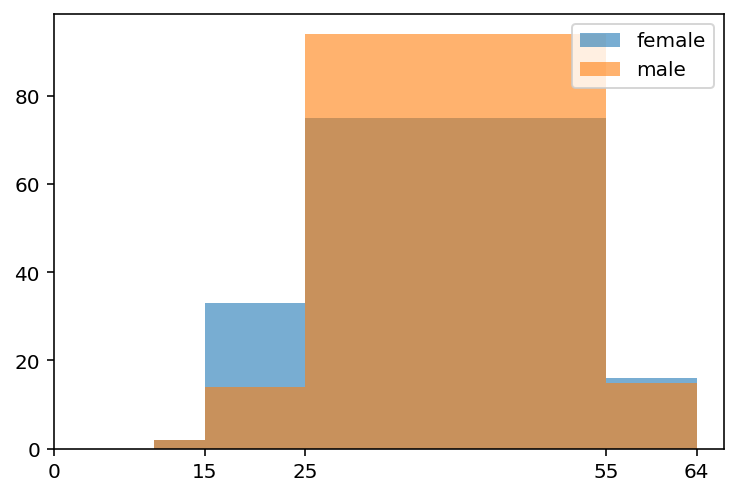

In [67]:
fig, ax = plt.subplots()
for label, gdf in df.groupby('sex'):
    ax.hist('age', data=gdf, bins=[10,15,25,55,64]
                 , label=label, alpha=0.6, histtype='step') # step is useful to compare Histogram
    
_ = ax.set_xticks([0,15,25,55,64])
_ = ax.legend()

In [93]:
%matplotlib widget
fig, axes = plt.subplots(ncols=1, nrows=2, sharex=True)
for i, (label, gdf) in enumerate(df.groupby('sex')):
    axes[0].hist('age', data=gdf, bins='auto'
                 , label=label, alpha=0.5, histtype='barstacked') 
    axes[1].hist('age', data=gdf, bins='auto'
                 , label=label, alpha=0.5, histtype='barstacked', density=True) 
    
    _ = axes[i].set_xticks([0,15,25,55,64])
_ = axes[0].legend()
_ = axes[0].set(title='counts', ylabel='N')
_ = axes[1].set(title='Density', ylabel='P', xlabel='Age')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

### Pie Chart
Let's see who all Survived in the Dataset

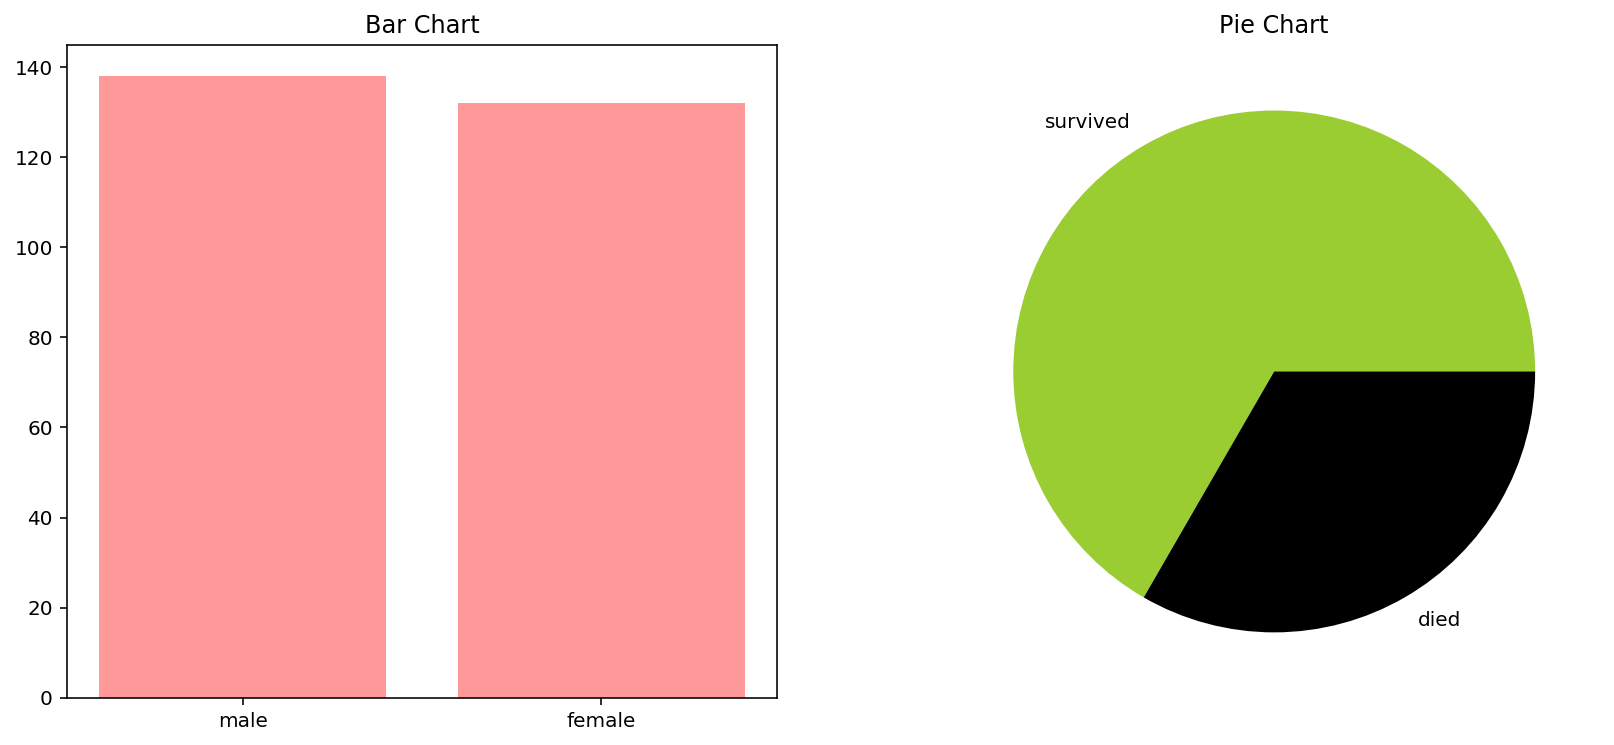

In [40]:
survived = df['survived'].value_counts()
sex_count = data=df['sex'].value_counts()
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,6))
_ = ax1.bar(x=sex_count.index, height=sex_count.values
            , alpha=0.4, color='red')
_ = ax1.set(xticks=[0,1], title='Bar Chart')
_ = ax2.pie(x=survived.values, labels=['survived','died'], colors=['yellowgreen', 'black'])
_ = ax2.set(title='Pie Chart')

### More Customized charts
Let's create some more customized charts by changing the rcParams function which handles all default styles.<br>
**Note that when you use rcParams as in the example below, it acts as a global parameter and you are changing the default style for every time you then use Matplotlib.**

[Text(0, 0.5, 'Count of Gender'),
 Text(0.5, 0, 'Gender'),
 Text(0.5, 1.0, 'Passenger Gender')]

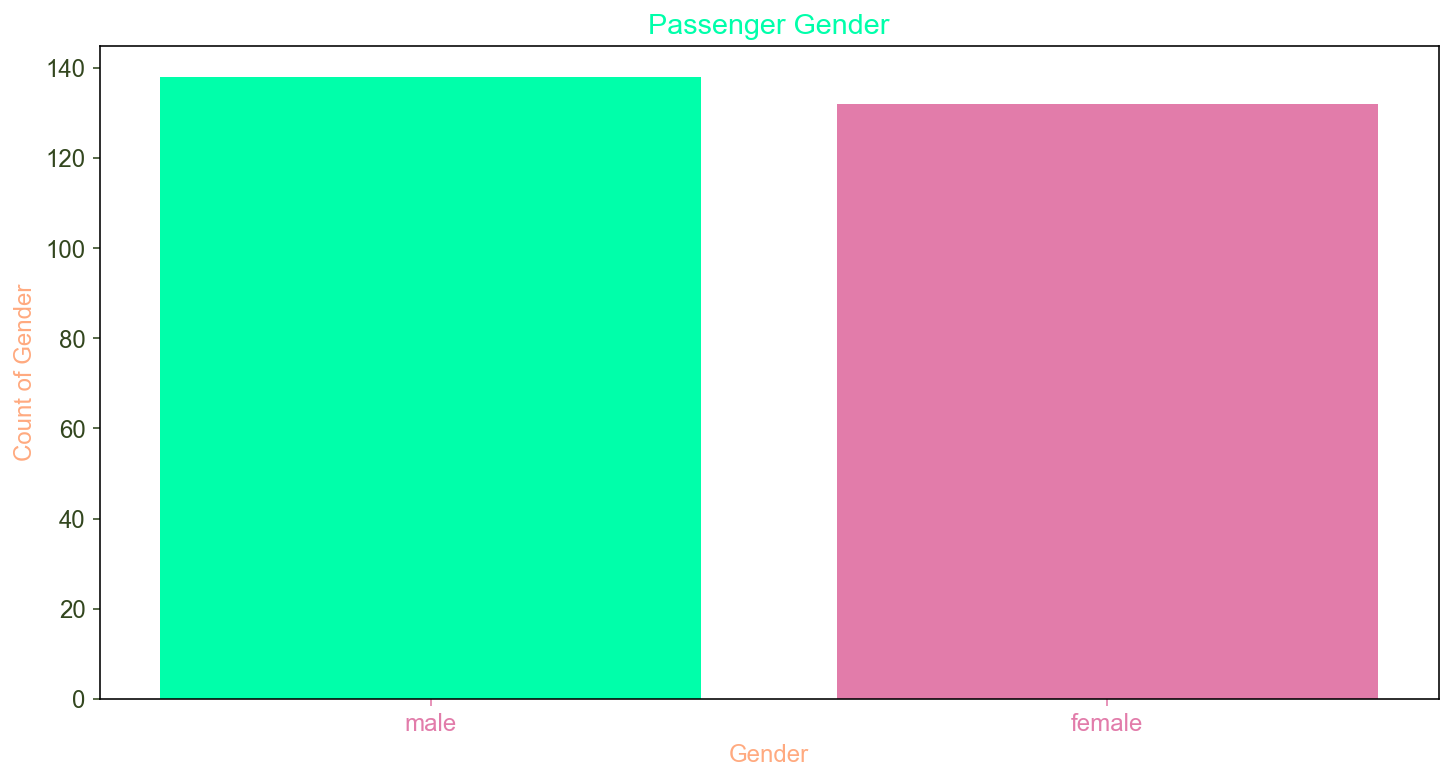

In [81]:
sex_count = data=df['sex'].value_counts()
fig, ax = plt.subplots(figsize=(12,6))

color_palette_list = ['#00ffaa', '#e27caa', '#ffaa80', '#33471f',   
                      '#799fec', '#0099CC']
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = color_palette_list[0]
plt.rcParams['axes.labelcolor']= color_palette_list[2]
plt.rcParams['xtick.color'] = color_palette_list[1]
plt.rcParams['ytick.color'] = color_palette_list[4]
plt.rcParams['font.size']=12

_= ax.bar(height=sex_count.values, x=sex_count.index, color = color_palette_list)
ax.set(title='Passenger Gender', xlabel='Gender', ylabel='Count of Gender')

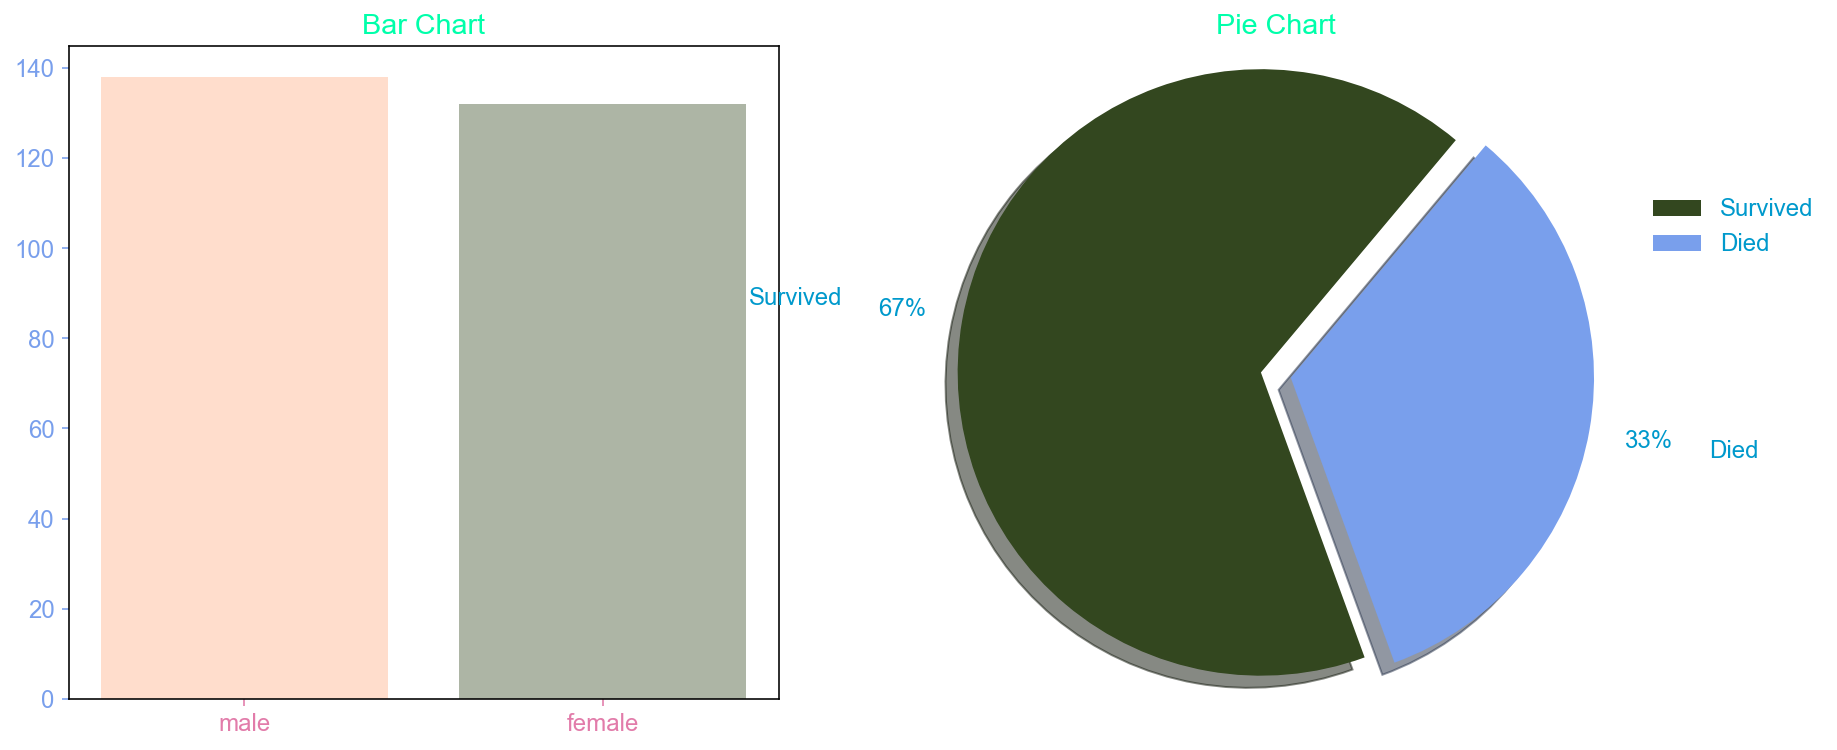

In [85]:
survived = df['survived'].value_counts()
sex_count = data=df['sex'].value_counts()
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,6))

color_palette_list = ['#00ffaa', '#e27caa', '#ffaa80', '#33471f',   
                      '#799fec', '#0099CC']
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = color_palette_list[5]
plt.rcParams['axes.labelcolor']= color_palette_list[5]
plt.rcParams['xtick.color'] = color_palette_list[1]
plt.rcParams['ytick.color'] = color_palette_list[4]
plt.rcParams['font.size']=12

_ = ax1.bar(x=sex_count.index, height=sex_count.values
            , alpha=0.4, color=color_palette_list[2:4])
_ = ax1.set(xticks=[0,1], title='Bar Chart')
_ = ax2.pie(x=survived.values, labels=['Survived','Died']
            , colors=color_palette_list[3:5], explode=(0.1,0)
            , autopct='%1.0f%%' # Autopct formats our values as strings with a set number of decimal points.
            , startangle=50 # Start angle of the pie chart
            , shadow = True
            , pctdistance=1.2, labeldistance=1.4)
_ = ax2.set(title='Pie Chart')
_ = ax2.axis('equal') # Setting the axes to be ‘equal’ ensures that we will have a circular pie chart
# Set legend location using bbox_to_anchor
# Hide frame bouding box
_ = ax2.legend(frameon=False, bbox_to_anchor=(1,0.8))

### Let's create some beautiful charts for Reference
#### We will use the file [Topic_Survey_Assignment.csv](Topic_Survey_Assignment.csv) for the assignment and will create the below ouput for the same.<br><br>
![](DesiredResult.jpg)


In [83]:
df = pd.read_csv('Topic_Survey_Assignment.csv')
df.head(5)

,Topic,Very interested,Somewhat interested,Not interested
0,Big Data (Spark / Hadoop),1332,729,127
1,Data Analysis / Statistics,1688,444,60
2,Data Journalism,429,1081,610
3,Data Visualization,1340,734,102
4,Deep Learning,1263,770,136


In [84]:
df.sort_values(by='Very interested', inplace=True, ascending=False)

Now let's change the values into percentage, first let's Group by the data to convert topic as Index<br>
Then change the each value into percentage

In [85]:
df = df.groupby('Topic').sum()
df

for i,indx in enumerate(df.index.values):
    total = df.iloc[i].sum()
    df.iloc[i:] = round(df.iloc[i:] / total *100, 2)
    
df

,Very interested,Somewhat interested,Not interested
Topic,,,
Big Data (Spark / Hadoop),60.88,33.32,5.80
Data Analysis / Statistics,77.01,20.25,2.74
Data Journalism,20.23,50.99,28.77
Data Visualization,61.57,33.74,4.69
Deep Learning,58.23,35.50,6.27
Machine Learning,74.73,21.88,3.38


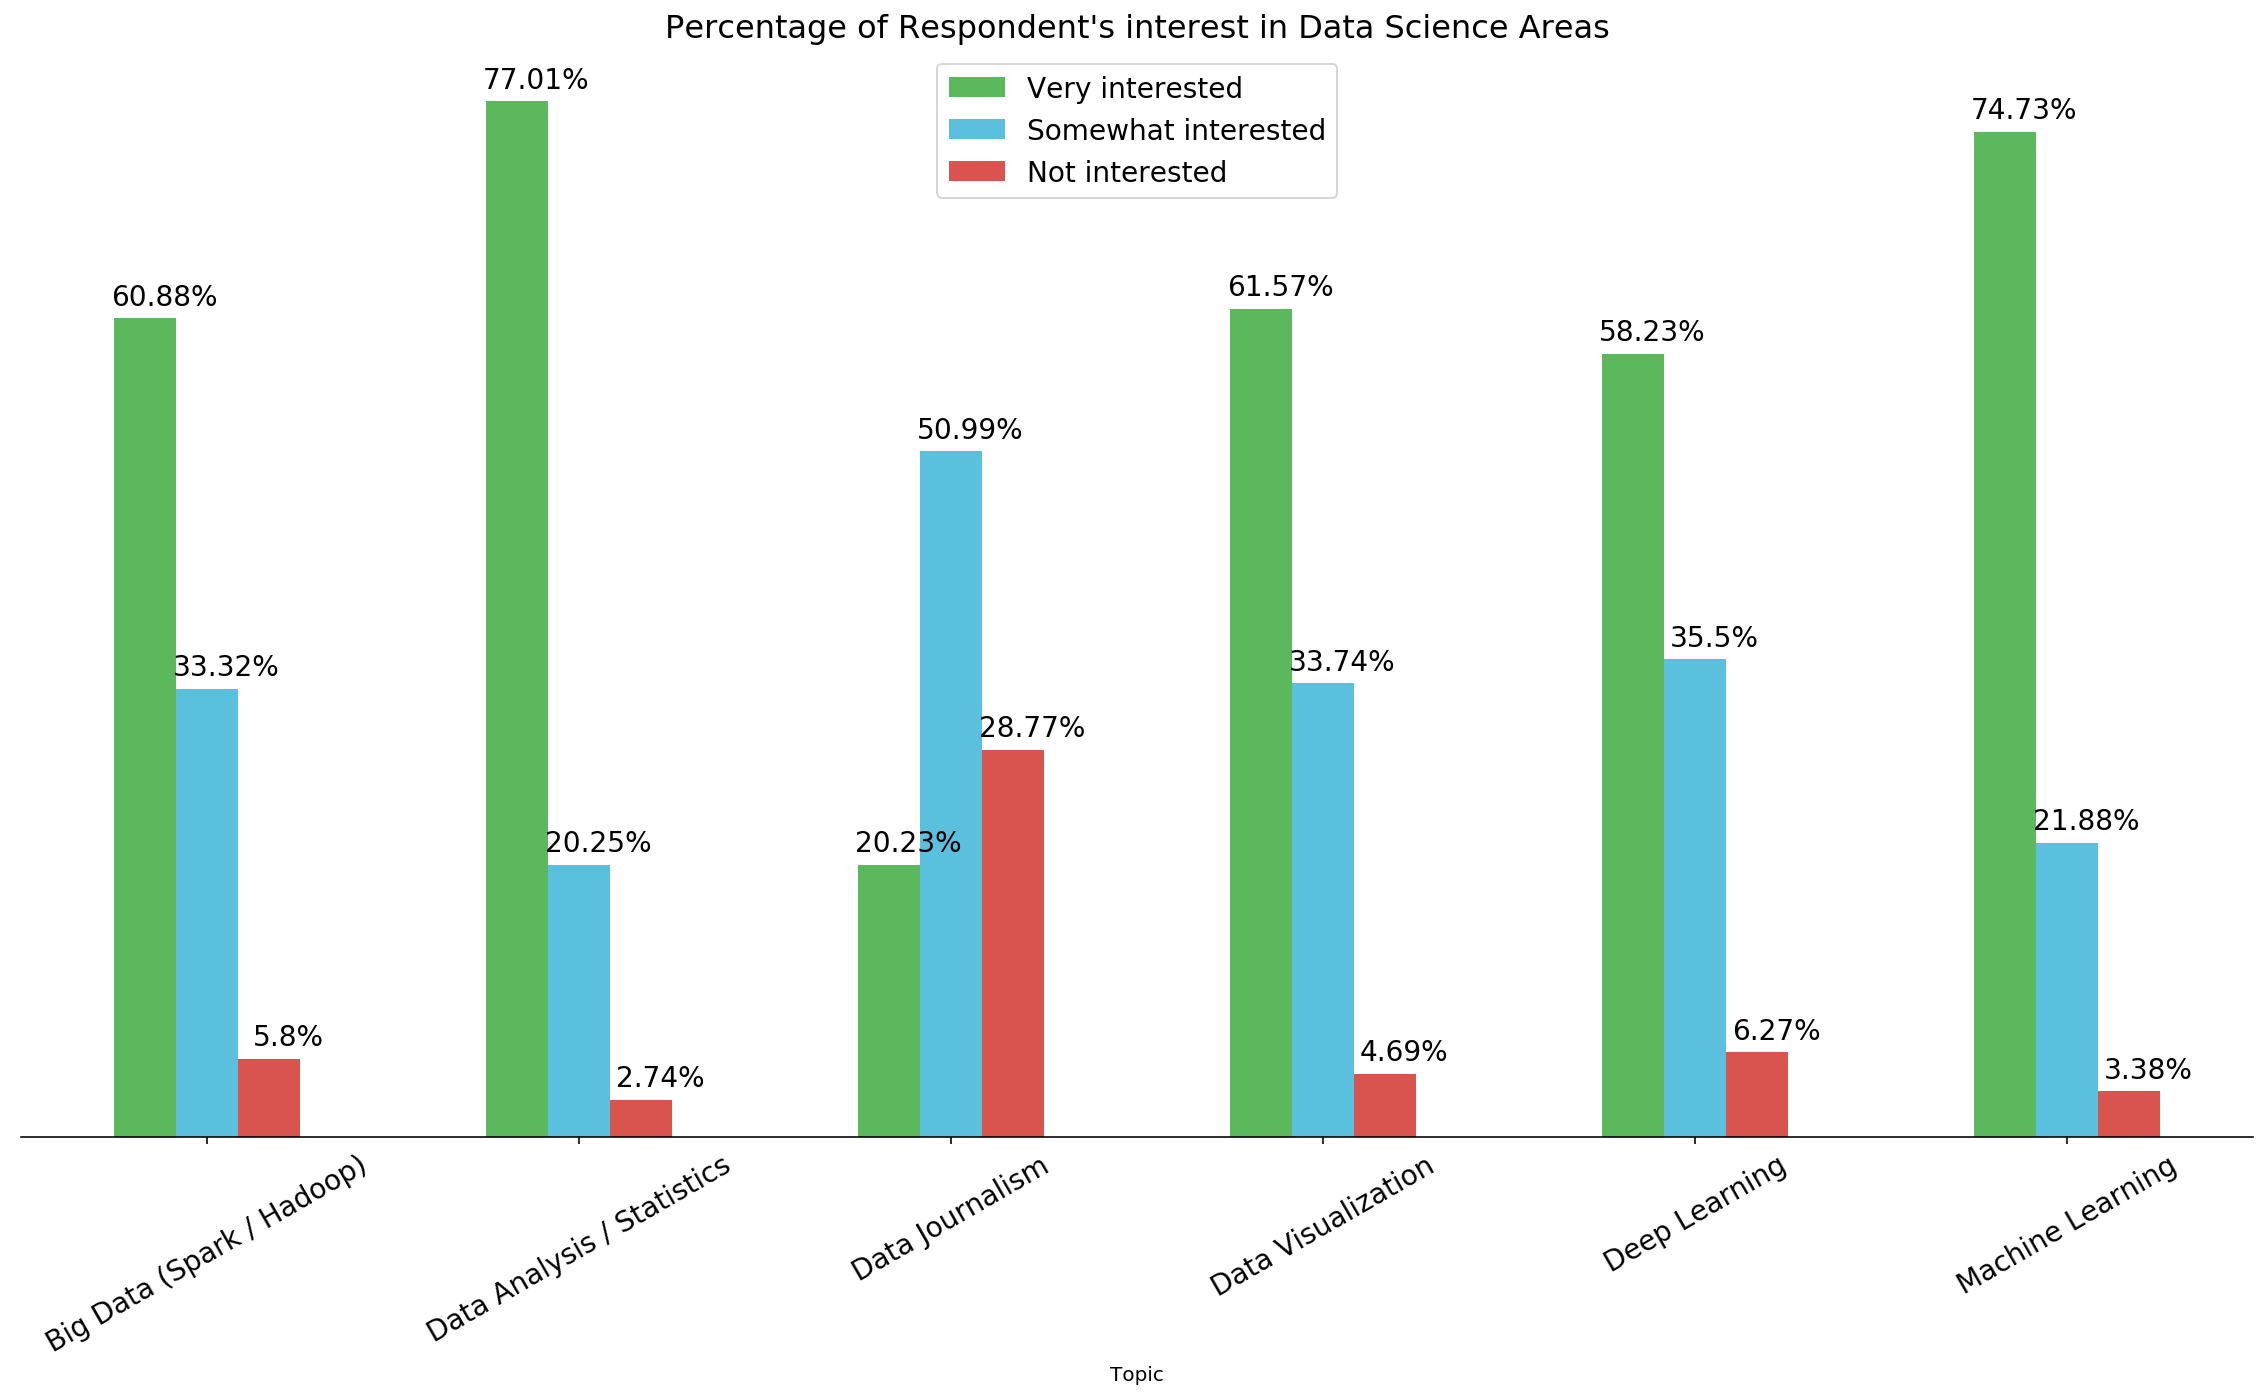

In [94]:
colors_list=['#5cb85c','#5bc0de','#d9534f']
ax = df.plot.bar(figsize=(20,10), color=colors_list)
# Set Title with font size 16
plt.title('Percentage of Respondent\'s interest in Data Science Areas',size=16)
# Shift Legend to upper right with font 14
plt.legend(loc='upper center', fontsize=14)
plt.xticks(fontsize=14, rotation = 30)
# Hide Y axis values
ax.yaxis.set_major_locator(plt.NullLocator())

# Remove the borders
ax.spines['left'].set_color(None)
ax.spines['right'].set_color(None)
ax.spines['top'].set_color(None)

# Show Percentage on Yticks
value_format = "{:.1%}"
# Loop throught the Rectangle objects of the plot to get the bars
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width()/2 + .05 # X position of text, start position + half width + margin
            , bar.get_height() + 1          # Y position of text
            , "{}%".format(bar.get_height()) # Text Value
            , fontsize=14 # Fontsize of text
            , ha="center" # Alignment of text
           )

plt.show()